In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, invgamma
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
setosa_filter = (y == 0)
sepal_length = X[setosa_filter][:, 0]



In [ ]:

mu_prior_mean = np.mean(sepal_length)
mu_prior_std = np.sqrt(1.0)
lambda_prior = 1.0
alpha_prior = 2.0
beta_prior = 1.0



In [ ]:

def likelihood(mu, sigma2, data):
    return np.prod(norm.pdf(data, loc=mu, scale=np.sqrt(sigma2)))


def prior(mu, sigma2):
    prior_mu = norm.pdf(mu, loc=mu_prior_mean, scale=mu_prior_std)
    prior_sigma2 = invgamma.pdf(sigma2, a=alpha_prior, scale=beta_prior)
    return prior_mu * prior_sigma2

def posterior(mu, sigma2, data):
    return prior(mu, sigma2) * likelihood(mu, sigma2, data)


In [ ]:

def metropolis_hastings(data, n_samples=1000):
    samples_mu = []
    samples_sigma2 = []


    mu_current = np.mean(data)
    sigma2_current = np.var(data)

    for _ in range(n_samples):
        mu_proposed = np.random.normal(mu_current, 0.5)
        sigma2_proposed = np.abs(np.random.normal(sigma2_current, 0.5))

        posterior_current = posterior(mu_current, sigma2_current, data)
        posterior_proposed = posterior(mu_proposed, sigma2_proposed, data)

        acceptance_raatio = posterior_proposed / posterior_current
        if np.random.rand() < acceptance_ratio:
            mu_current = mu_proposed
            sigma2_current = sigma2_proposed


        samples_mu.append(mu_current)
        samples_sigma2.append(sigma2_current)

    return np.array(samples_mu), np.array(samples_sigma2)



In [ ]:

n_samples = 1000
mu_samples, sigma2_samples = metropolis_hastings(sepal_length, n_samples=n_samples)



Text(0, 0.5, 'Probability Density')

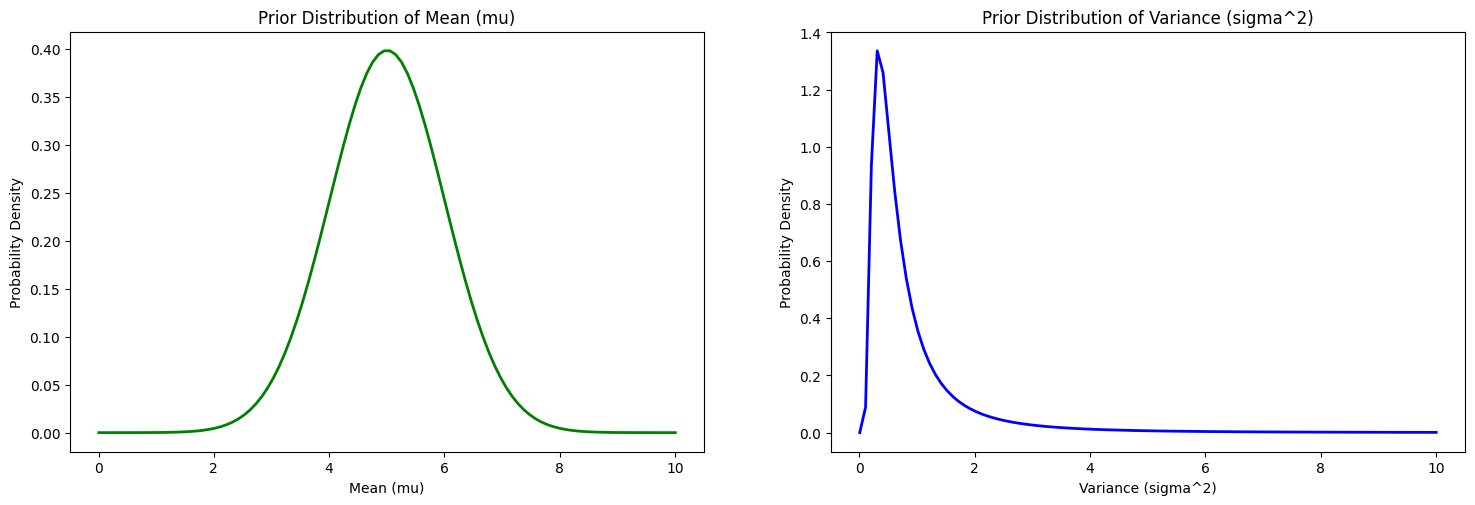

In [ ]:

plt.figure(figsize=(18, 12))


mu_range = np.linspace(mu_prior_mean - 5 * mu_prior_std, mu_prior_mean + 5 * mu_prior_std, 100)
prior_mu = norm.pdf(mu_range, loc=mu_prior_mean, scale=mu_prior_std)

plt.subplot(2, 2, 1)
plt.plot(mu_range, prior_mu, 'g-', lw=2)
plt.title('Prior Distribution of Mean (mu)')
plt.xlabel('Mean (mu)')
plt.ylabel('Probability Density')


sigma2_range = np.linspace(0.01, 10, 100)
prior_sigma2 = invgamma.pdf(sigma2_range, a=alpha_prior, scale=beta_prior)

plt.subplot(2, 2, 2)
plt.plot(sigma2_range, prior_sigma2, 'b-', lw=2)
plt.title('Prior Distribution of Variance (sigma^2)')
plt.xlabel('Variance (sigma^2)')
plt.ylabel('Probability Density')


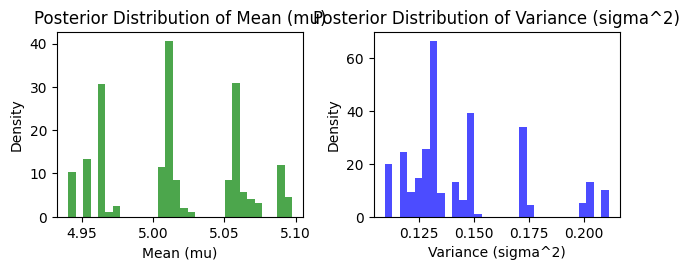

Estimated Mean (mu): 5.015086989254557
Estimated Variance (sigma^2): 0.14359614700674955


In [ ]:

plt.subplot(2, 2, 3)
plt.hist(mu_samples, bins=30, density=True, alpha=0.7, color='g')
plt.title('Posterior Distribution of Mean (mu)')
plt.xlabel('Mean (mu)')
plt.ylabel('Density')

plt.subplot(2, 2, 4)
plt.hist(sigma2_samples, bins=30, density=True, alpha=0.7, color='b')
plt.title('Posterior Distribution of Variance (sigma^2)')
plt.xlabel('Variance (sigma^2)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

print(f"Estimated Mean (mu): {np.mean(mu_samples)}")
print(f"Estimated Variance (sigma^2): {np.mean(sigma2_samples)}")

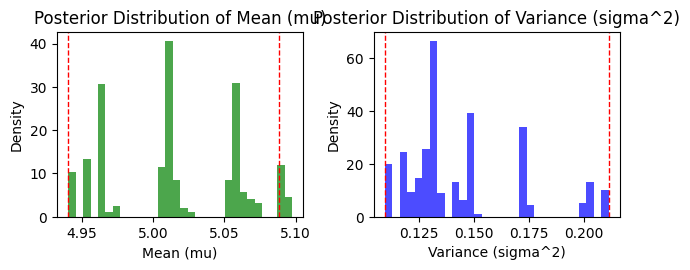

Estimated Mean (mu): 5.015086989254557
Estimated Variance (sigma^2): 0.14359614700674955
95% Credible Interval for mu: [4.94028412 5.08809638]
95% Credible Interval for sigma^2: [0.10953644 0.21112411]


In [ ]:
credible_interval_mu = np.quantile(mu_samples, [0.025, 0.975])
credible_interval_sigma2 = np.quantile(sigma2_samples, [0.025, 0.975])


plt.subplot(2, 2, 3)
plt.hist(mu_samples, bins=30, density=True, alpha=0.7, color='g')
plt.axvline(credible_interval_mu[0], color='red', linestyle='dashed', linewidth=1)
plt.axvline(credible_interval_mu[1], color='red', linestyle='dashed', linewidth=1)
plt.title('Posterior Distribution of Mean (mu)')
plt.xlabel('Mean (mu)')
plt.ylabel('Density')

plt.subplot(2, 2, 4)
plt.hist(sigma2_samples, bins=30, density=True, alpha=0.7, color='b')
plt.axvline(credible_interval_sigma2[0], color='red', linestyle='dashed', linewidth=1)
plt.axvline(credible_interval_sigma2[1], color='red', linestyle='dashed', linewidth=1)
plt.title('Posterior Distribution of Variance (sigma^2)')
plt.xlabel('Variance (sigma^2)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

print(f"Estimated Mean (mu): {np.mean(mu_samples)}")
print(f"Estimated Variance (sigma^2): {np.mean(sigma2_samples)}")
print(f"95% Credible Interval for mu: {credible_interval_mu}")
print(f"95% Credible Interval for sigma^2: {credible_interval_sigma2}")